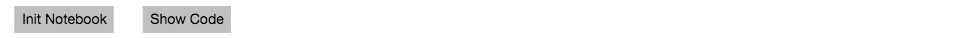

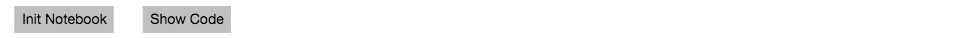

<IPython.core.display.Javascript object>

In [1]:
# %load_ext autoreload
# %autoreload 2

import ipywidgets as widgets
import custom_widgets as cw
from IPython.display import display, HTML, Javascript, clear_output

cw.load_js_extensions()

toggle_code = cw.ToggleCodeCellsWidget()
toggle_code.code_shown = False
init_nb = cw.InitNotebook()
box = widgets.HBox([init_nb, toggle_code])
box.width = '25%'
box.layout.justify_content = 'space-around'
box

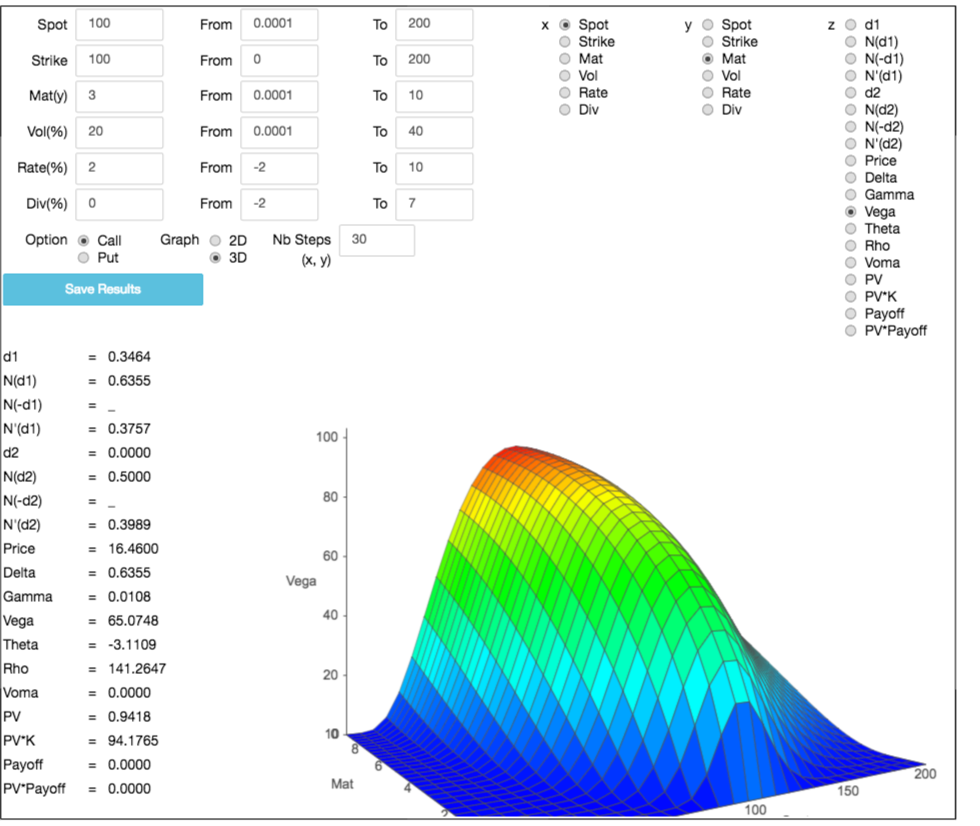

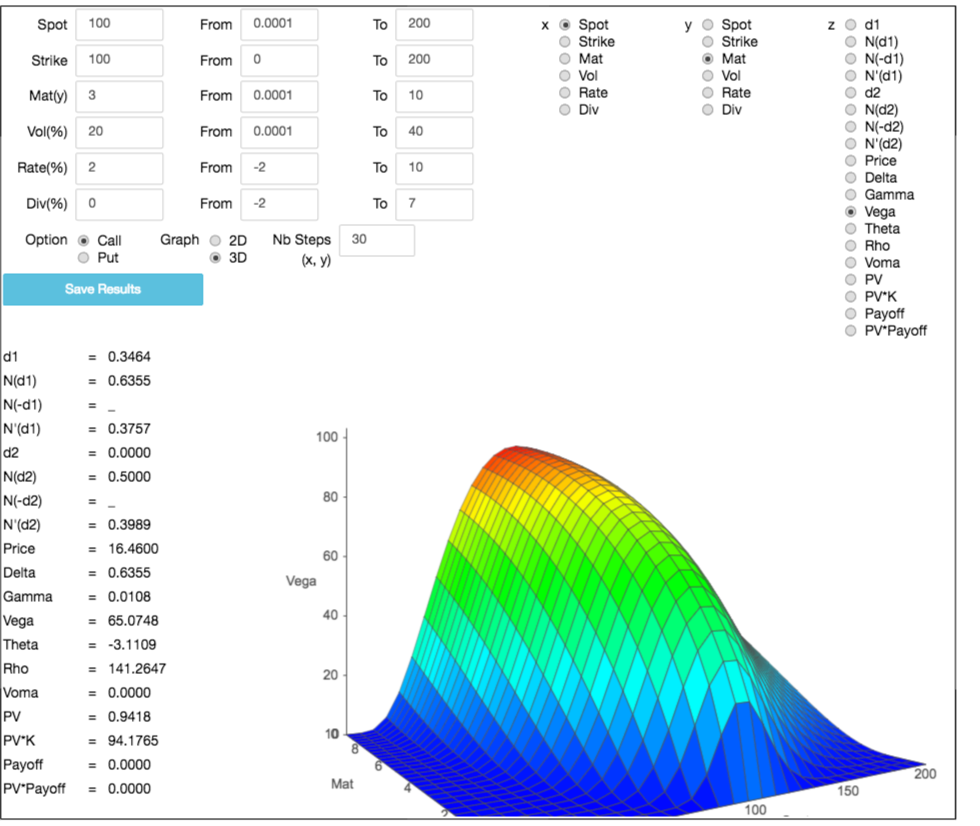

In [2]:
from blackscholes_widget import BlackScholesWidget

bsw = BlackScholesWidget()
clear_output()
bsw.form

## Reference: BlackScholes formulae

### Inputs

| Input | Symbol | 
|:---|:---:|:---:|
| Spot in currency | $$S$$ |
| Strike in the same unit as Spot | $$K$$ | 
| Maturity in years | $$T$$ | 
| Volatility in % e.g. 15%=0.15 | $$\sigma$$ | 
| Risk free interest rate in % e.g. 1.5%=0.015 | $$r$$ | 
| Continuous dividend rate in % e.g. 2%=0.02 | $$q$$ | 
  
### Outputs


| **Option** | **Call** | **Put** |
| :--------: |:--------:|:-------:|
| $$Payoff$$   | $$Max(0, S-K)$$  | $$Max(0, K-S)$$   |
| $$Value=V$$   | $$Se^{-qT}N(d_1)-Ke^{-rT}N(d_2)$$  | $$Ke^{-rT}N(-d_2)-Se^{-qT}N(-d_1)$$   |
| $$\Delta=\frac{\partial V}{\partial S}$$   | $$e^{-qT}N(d_1)$$  | $$-e^{-qT}N(-d_1)$$   |
| $$\Gamma=\frac{\partial \Delta}{\partial S}$$   | $$e^{-qT}\frac{N'(d_1)}{S\sigma\sqrt{T}}$$  | $$e^{-qT}\frac{N'(d_1)}{S\sigma\sqrt{T}}$$   |
| $$\nu=\frac{\partial V}{\partial \sigma}$$   | $$Se^{-qT}N'(d_1)\sqrt{T}=Ke^{-rT}N'(d_2)\sqrt{T}$$  | $$Se^{-qT}N'(d_1)\sqrt{T}=Ke^{-rT}N'(d_2)\sqrt{T}$$   |
| $$\Theta=-\frac{\partial V}{\partial T}$$   | $$-e^{qT}\frac{SN'(d_1)\sigma}{2\sqrt{T}}-rKe^{-rT}N(d_2)+qSe^{-qT}N(d_1)$$  | $$-e^{qT}\frac{SN'(d_1)\sigma}{2\sqrt{T}}+rKe^{-rT}N(-d_2)-qSe^{-qT}N(-d_1)$$   |
| $$\rho=\frac{\partial V}{\partial r}$$   | $$KTe^{-rT}N(d_2)$$  | $$-KTe^{-rT}N(-d_2)$$   |
| $$Voma=\frac{\partial\nu}{\partial \sigma}$$   | $$Se^{-qT}N'(d_1)\sqrt{T}\frac{d_1 d_2}{\sigma}$$  | $$Se^{-qT}N'(d_1)\sqrt{T}\frac{d_1 d_2}{\sigma}$$   |

### with

$$\frac{\partial V}{\partial t} + rS\frac{\partial V}{\partial S} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2}=rV$$

$$d_1=\frac{\log(S/K) + (r-q +\sigma^2/2)T}{\sigma \sqrt{T}}$$

$$d_2=\frac{\log(S/K) + (r-q -\sigma^2/2)T}{\sigma \sqrt{T}}=d_1 - \sigma \sqrt{T - t}$$

$$N(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x} e^{-\frac{t^{2}}{2}}dt$$

$$N'(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^{2}}{2}}$$